## **VGG16**
![](https://miro.medium.com/v2/resize:fit:861/0*6VP81rFoLWp10FcG)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTING NECESSARY LIBRARIES FOR TRAINING OF MODEL**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
from sklearn.metrics import confusion_matrix


### Training & DataLoader


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/RiceLeafsDisease/train'
valid_path = '/content/drive/MyDrive/RiceLeafsDisease/valid/'
test_path  = '/content/drive/MyDrive/RiceLeafsDisease/test/'

### Building the VGG16


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/RiceLeafsDisease/train/*')
print(len(folders))


4


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)


### Summary


In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Training The VGG16


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1400 images belonging to 4 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 352 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [ ]:
#Printing the classes.
class_dict = training_set.class_indices
(class_dict)
li = list(class_dict.keys())
print(li)

['brown_spot', 'healthy', 'hispa', 'leaf_blast']


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs= 50,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/50
44/44 [==============================] - 952s 21s/step - loss: 1.2288 - accuracy: 0.4800 - val_loss: 0.8561 - val_accuracy: 0.6534
Epoch 2/50
44/44 [==============================] - 113s 3s/step - loss: 0.8514 - accuracy: 0.6479 - val_loss: 0.9174 - val_accuracy: 0.6705
Epoch 3/50
44/44 [==============================] - 111s 3s/step - loss: 0.7421 - accuracy: 0.7057 - val_loss: 0.8804 - val_accuracy: 0.6591
Epoch 4/50
44/44 [==============================] - 112s 3s/step - loss: 0.6370 - accuracy: 0.7529 - val_loss: 0.6177 - val_accuracy: 0.7670
Epoch 5/50
44/44 [==============================] - 112s 3s/step - loss: 0.5783 - accuracy: 0.7779 - val_loss: 0.6190 - val_accuracy: 0.7670
Epoch 6/50
44/44 [==============================] - 112s 3s/step - loss: 0.5408 - accuracy: 0.7979 - val_loss: 0.6349 - val_accuracy: 0.7557
Epoch 7/50
44/44 [==============================] - 113s 3s/step - loss: 0.4860 - accuracy: 0.8314 - val_loss: 0.6286 - val_accuracy: 0.7500
Epoch 8/50
4

In [ ]:
# Save the trained model
dir = '/content/gdrive/My Drive/SDP'
model.save(f"{dir}/VGG16_model.h5")

In [ ]:
#Finding the accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(valid_set, batch_size= 32 )
print(f"Valid Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
11/11 [==============================] - 19s 2s/step - loss: 0.7533 - accuracy: 0.7955
Valid Accuracy: 79.54545617103577


In [ ]:
#Finding the accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set, batch_size= 32 )
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
4/4 [==============================] - 66s 20s/step - loss: 1.4680 - accuracy: 0.7500
Test Accuracy: 75.0


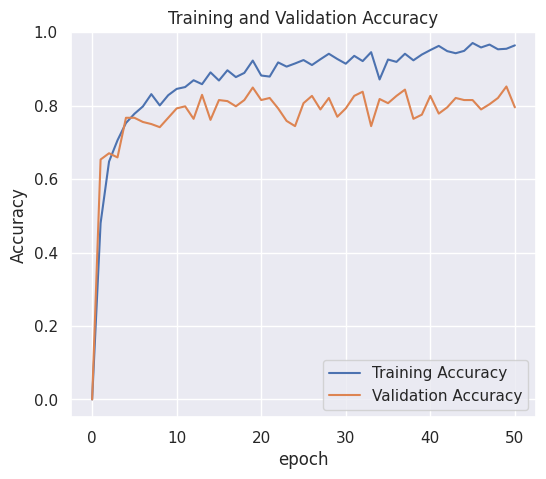

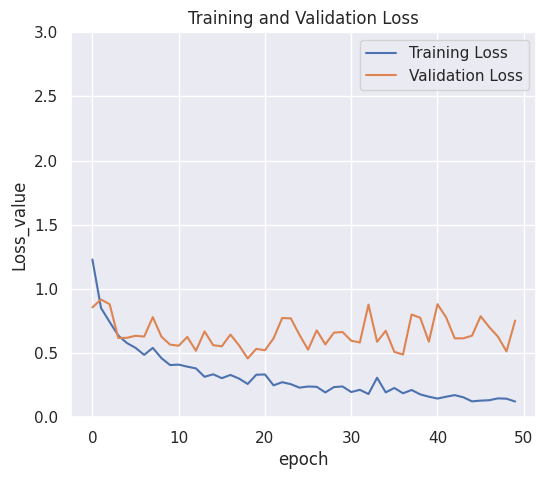

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
acc = [0.] + r.history['accuracy']
val_acc = [0.] + r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(6, 5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.savefig('VGG16_acc')

print()
plt.figure(figsize=(6, 5))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss_value')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('VGG16_Loss')

plt.show()

F1 Score and Confusion Matrix

4/4 [==============================] - 1s 140ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.85      0.57      0.68        30
           2       0.55      1.00      0.71        30
           3       0.90      0.60      0.72        30

    accuracy                           0.75       120
   macro avg       0.82      0.75      0.75       120
weighted avg       0.82      0.75      0.75       120



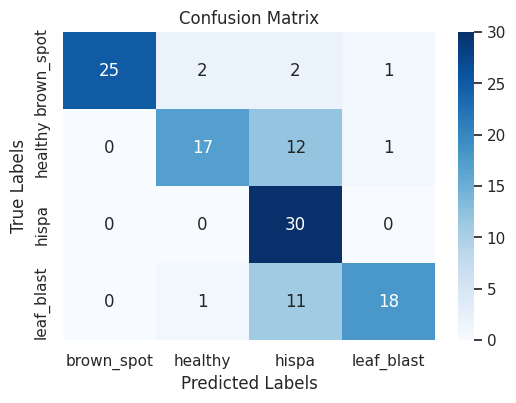

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Get the predicted labels for the validation set### Libraries
# Load the trained model
#model = keras.models.load_model("RESNET50_model.h5")

test_step_sz = test_set.n/test_set.batch_size
test_images, test_labels = [], []
for i in np.arange(test_step_sz):
    batch_images, batch_labels = test_set.next()
    test_images.append(batch_images)
    test_labels.append(batch_labels)


test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)



y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = np.argmax(test_labels, axis =1)

# Calculate classification metrics
report = classification_report(y_true, y_pred)
print(report)




# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get class labels
class_labels = list(valid_set.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.savefig("ResNet50_ConfusionMatrix.png")



### Testing


In [ ]:
# predicting an image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_path= 'C:/Users/Dell/Desktop/SDP FINAL/Rice_Dataset_2/RiceLeafsDisease/test/healthy/IMG_3233.jpg'
test_image = image.load_img(img_path, target_size = (224,224))
image = image.img_to_array(test_image)
image = image/255
image = np.expand_dims(test_image, axis = 0)

print("Following is our prediction:")
prediction = model.predict(image)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name
plt.figure(figsize = (4,4))
plt.imshow(test_image)
plt.axis('off')
plt.title(class_name)
plt.show()





FileNotFoundError: ignored

In [ ]:
# Load the trained model
model = keras.models.load_model("VGG16_model.h5")

# Make predictions on the test images
predictions = model.predict(test_set)

# Get the predicted class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the class names
class_names = training_set.class_indices

# Get the disease labels
disease_labels = {
    0: "Brown_Spot",
    1: "Healthy",
    2: "Hispa",
    3: "Leaf_Blast"
}

# Print the predictions for each test image
for i in range(len(test_set.filenames)):
    image_path = os.path.join(test_path, test_set.filenames[i])
    image_label = predicted_labels[i]
    #image_class = class_names[image_label]
    image_disease = disease_labels[image_label]
    print(f"Image: {image_path}")
    #print(f"Class: {image_class}")
    print(f"Disease: {image_disease}")
    print("----------------------")

### Graph Representation

### F1 Score

In [ ]:
'''from sklearn.metrics import accuracy_score, classification_report
# Get the predicted labels for the validation set### Libraries
y_pred = model.predict(valid_set)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation set
y_true = valid_set.classes

# Calculate classification metrics
report = classification_report(y_true, y_pred)
print(report)'''

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
# Assuming you have predictions and ground truth labels
predictions = model.predict(valid_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = valid_set.classes

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
report = classification_report(true_labels, predicted_labels)
print(report)

print("F1 Score: {:.4f}".format(f1))

# Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Load the trained model
model = keras.models.load_model("VGG16_model.h5")

#Finding the accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(valid_set, batch_size= 32 )
result= scores[1]*100
print(f"Test Accuracy: ",result)


# Assuming you have the model predictions and true labels
predictions = model.predict(valid_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = valid_set.classes

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = list(valid_set.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
